In [ ]:
import pandas as pd
import seaborn as sns
import ast 
import matplotlib.pyplot as plt 

# Chemin vers ton fichier
file_path = "~/ValorantChampions/data/player_stats_moyennes_roles_2025.csv"

# Charger le fichier dans un DataFrame
df = pd.read_csv(file_path)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   player            81 non-null     object 
 1   player_name       81 non-null     object 
 2   team              81 non-null     object 
 3   rating            81 non-null     float64
 4   acs               81 non-null     float64
 5   kd_ratio          81 non-null     float64
 6   kast              81 non-null     int64  
 7   adr               81 non-null     float64
 8   kpr               81 non-null     float64
 9   apr               81 non-null     float64
 10  fkpr              81 non-null     float64
 11  fdpr              81 non-null     float64
 12  hs_percent        81 non-null     int64  
 13  cl_percent        81 non-null     int64  
 14  map_played        81 non-null     int64  
 15  maps_won          81 non-null     int64  
 16  map_winrate       81 non-null     float64
 17 

In [4]:
df.head(3)

,player,player_name,team,rating,acs,kd_ratio,kast,adr,kpr,apr,fkpr,fdpr,hs_percent,cl_percent,map_played,maps_won,map_winrate,agents_played,agents_win_count,roles
0,aspas,aspas,MIBR,1.33,261.6,1.66,79,164.7,0.97,0.13,0.20,0.07,26,8,15,9,60.00,"{'Jett': 4, 'Neon': 5, 'Raze': 2, 'Waylay': 4}","{'Jett': 1, 'Neon': 4, 'Raze': 1, 'Waylay': 3}",['Duelliste']
1,RieNs,RieNs,TH,1.17,226.1,1.14,73,148.9,0.79,0.33,0.07,0.05,34,20,12,7,58.33,"{'Fade': 8, 'Sova': 4}","{'Fade': 5, 'Sova': 2}",['Initiateur']
2,brawk,brawk,NRG,1.16,224.6,1.17,76,144.7,0.73,0.34,0.07,0.06,17,9,17,13,76.47,"{'Sova': 14, 'Vyse': 3}","{'Sova': 10, 'Vyse': 3}","['Sentinelle', 'Initiateur']"


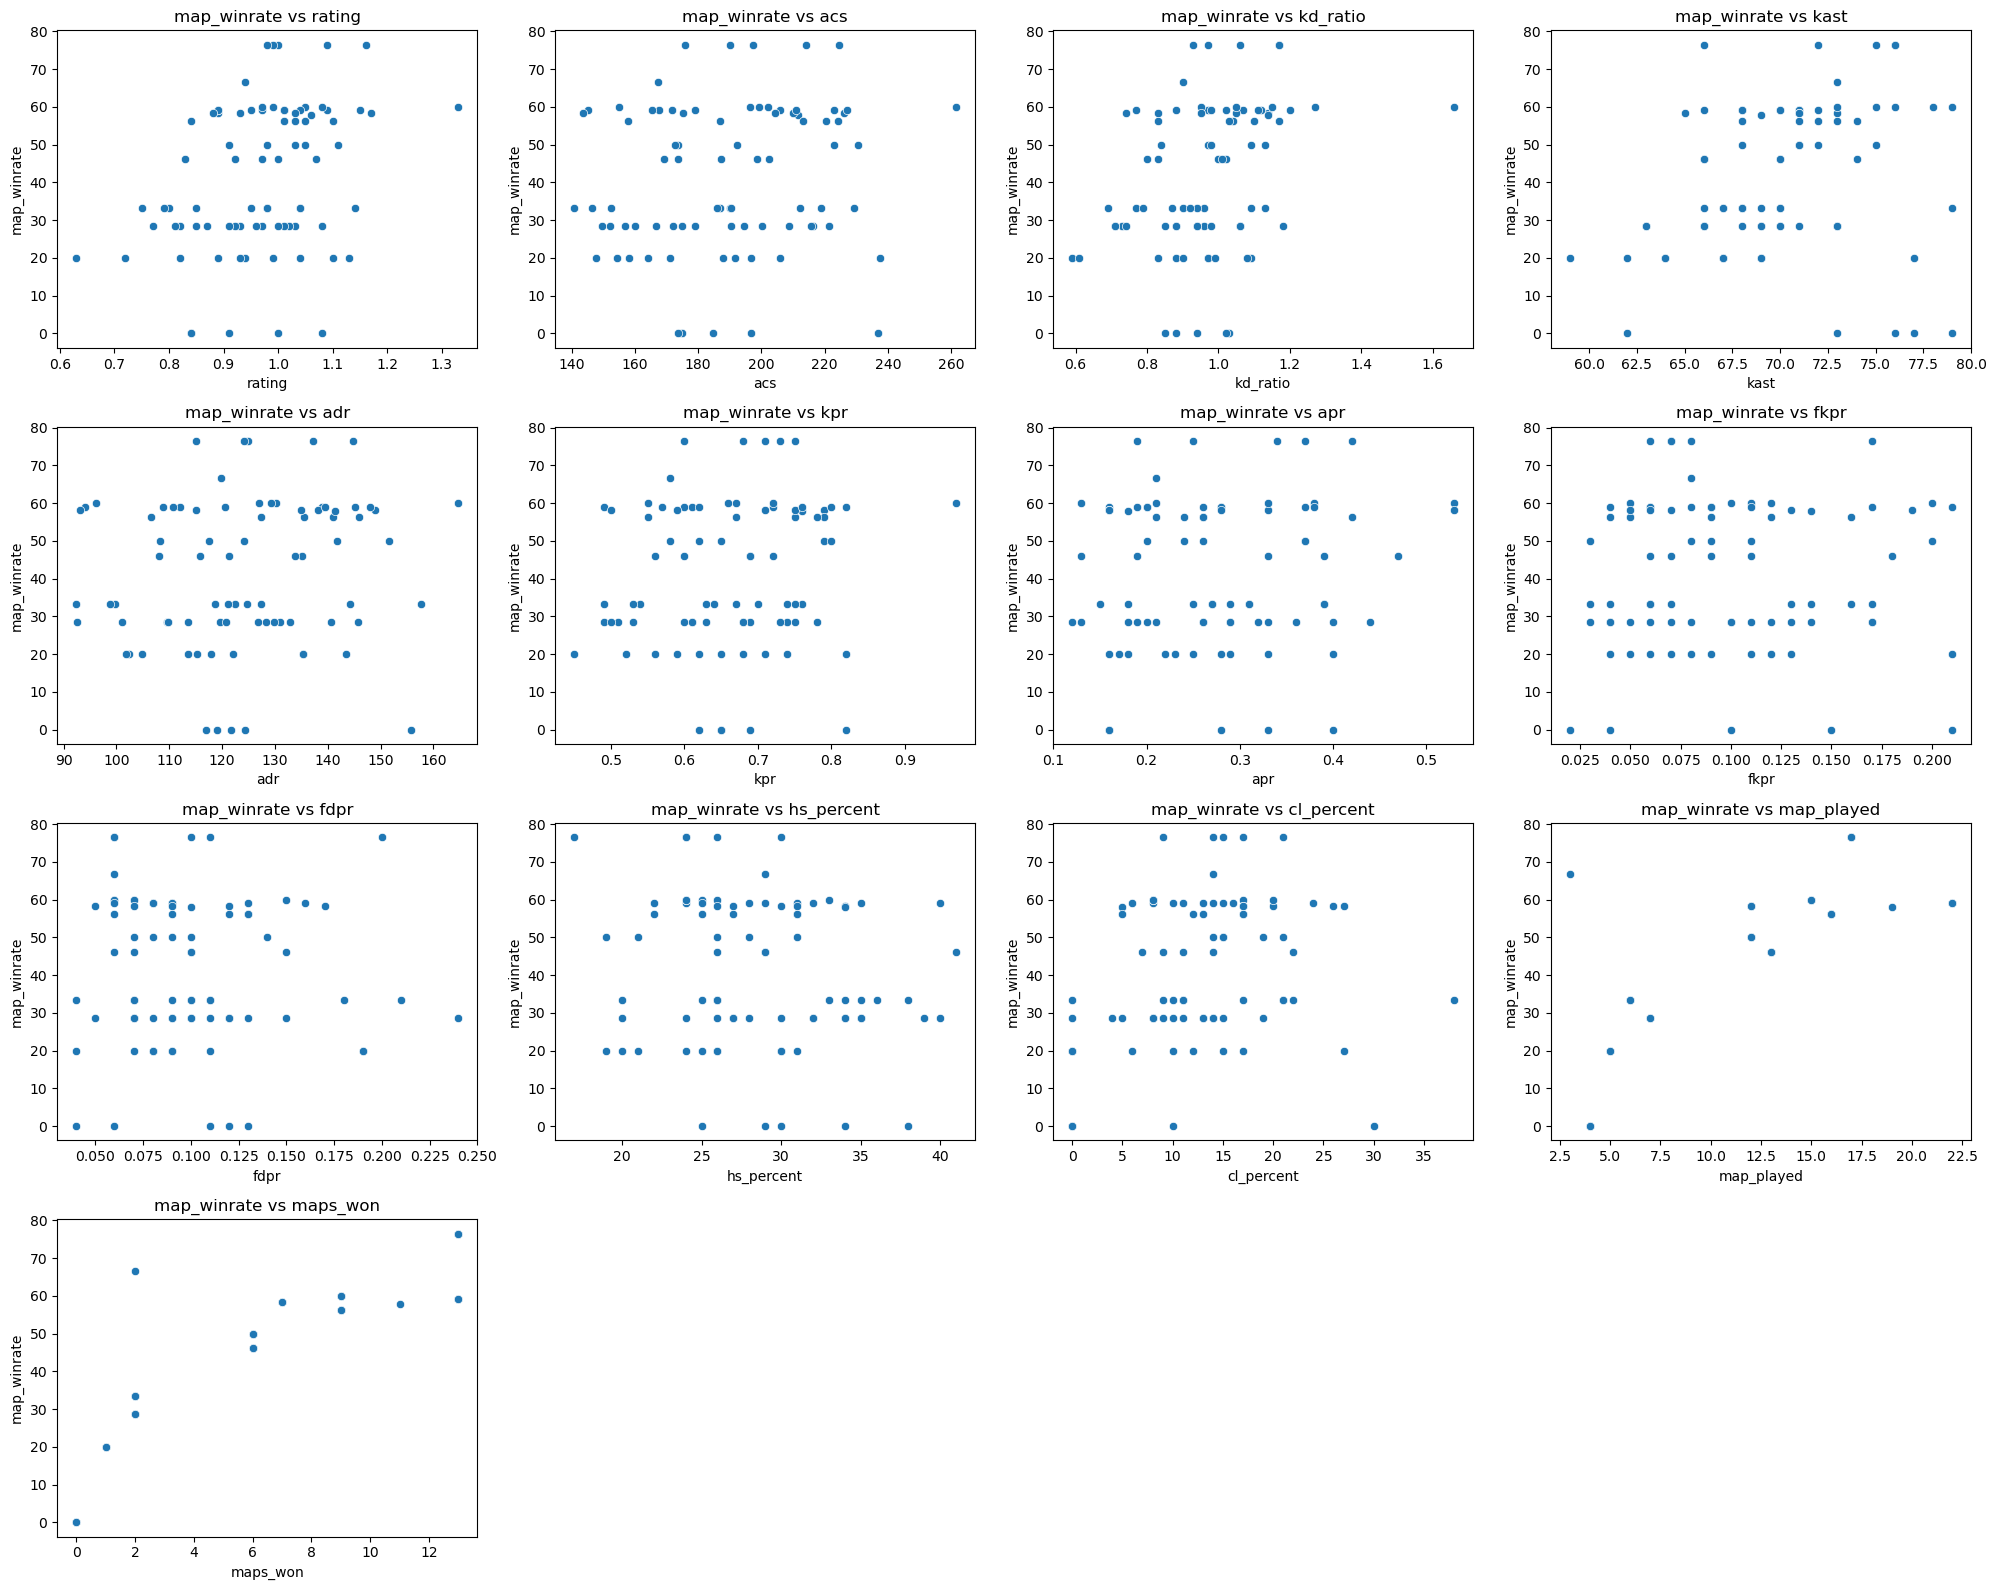

In [5]:
# Colonnes numériques sauf map_winrate
num_cols = df.select_dtypes(include='number').columns.tolist()
if 'map_winrate' in num_cols:
    num_cols.remove('map_winrate')

# Nombre de subplots
n = len(num_cols)
cols = 4  # 4 colonnes de subplots
rows = (n + cols - 1) // cols  # pour arrondir vers le haut

fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 4*rows))
axes = axes.flatten()  # pour itérer facilement

for i, col in enumerate(num_cols):
    sns.scatterplot(data=df, x=col, y='map_winrate', ax=axes[i])
    axes[i].set_title(f'map_winrate vs {col}')

# Supprimer les axes vides si n < rows*cols
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [6]:
total_matches = 0
for idx, row in df.iterrows():
    played_dict = ast.literal_eval(row['agents_played'])
    total_matches += sum(played_dict.values())

print("Nombre total de matchs :", total_matches)

Nombre total de matchs : 880


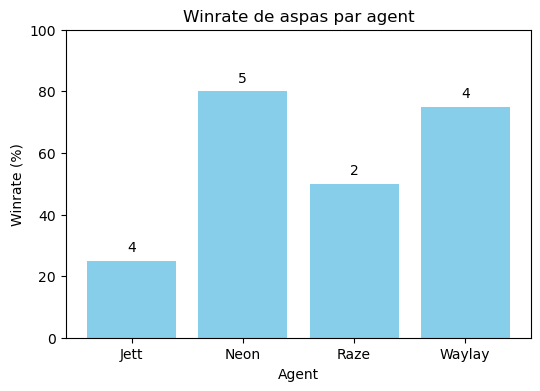

In [7]:
# Filtrer Alfajer
alfajer_df = df[df['player'] == 'Alfajer']

# Convertir les colonnes string en dictionnaires
agents_played = ast.literal_eval(df['agents_played'].values[0])
agents_win_count = ast.literal_eval(df['agents_win_count'].values[0])

# Créer un DataFrame pour le graphique
df_agents = pd.DataFrame({
    'agent': list(agents_played.keys()),
    'games_played': list(agents_played.values()),
    'wins': [agents_win_count.get(agent, 0) for agent in agents_played.keys()]
})

# Calculer le winrate
df_agents['winrate'] = df_agents['wins'] / df_agents['games_played'] * 100

# Graphique
plt.figure(figsize=(6,4))
bars = plt.bar(df_agents['agent'], df_agents['winrate'], color='skyblue')
plt.ylabel("Winrate (%)")
plt.xlabel("Agent")
plt.title(f"Winrate de {df['player'].values[0]} par agent")
plt.ylim(0, 100)

# Ajouter le nombre de parties au-dessus des barres
for bar, games in zip(bars, df_agents['games_played']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, str(games),
             ha='center', va='bottom', fontsize=10)

plt.show()

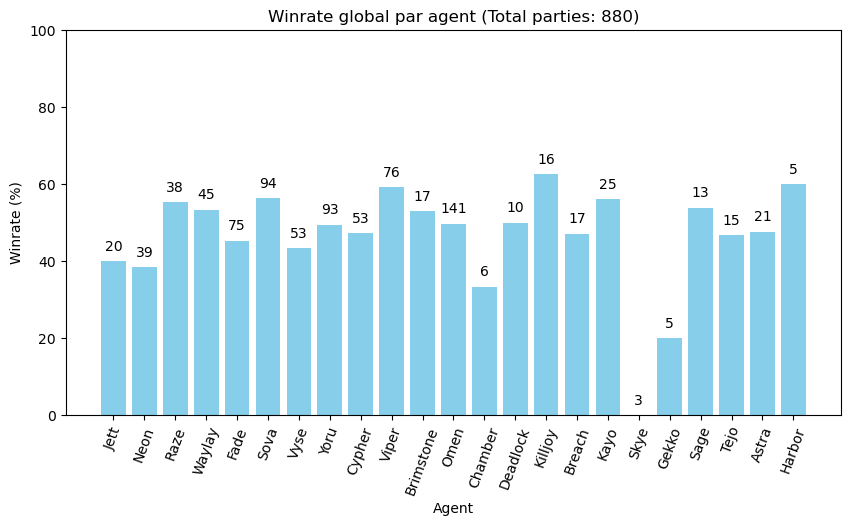

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import ast
from collections import defaultdict

# Supposons df déjà chargé

total_played = defaultdict(int)
total_wins = defaultdict(int)

# Parcourir toutes les lignes
for idx, row in df.iterrows():
    played_dict = ast.literal_eval(row['agents_played'])
    wins_dict = ast.literal_eval(row['agents_win_count'])
    
    for agent, games in played_dict.items():
        total_played[agent] += games
    for agent, wins in wins_dict.items():
        total_wins[agent] += wins

# Créer un DataFrame pour le graphique
df_agents = pd.DataFrame({
    'agent': list(total_played.keys()),
    'games_played': list(total_played.values()),
    'wins': [total_wins.get(agent, 0) for agent in total_played.keys()]
})

# Calculer le winrate
df_agents['winrate'] = df_agents['wins'] / df_agents['games_played'] * 100

# Calcul du nombre total de parties
total_matches = df_agents['games_played'].sum()

# Graphique
plt.figure(figsize=(10,5))
bars = plt.bar(df_agents['agent'], df_agents['winrate'], color='skyblue')
plt.ylabel("Winrate (%)")
plt.xlabel("Agent")
plt.title(f"Winrate global par agent (Total parties: {total_matches})")
plt.ylim(0, 100)

# Ajouter le nombre de parties par agent au-dessus des barres
for bar, games in zip(bars, df_agents['games_played']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, str(games),
             ha='center', va='bottom', fontsize=10)

# Mettre les noms à l'horizontal
plt.xticks(rotation=70)

plt.show()


In [9]:
df_agents.head(3)

,agent,games_played,wins,winrate
0,Jett,20,8,40.000000
1,Neon,39,15,38.461538
2,Raze,38,21,55.263158
